In [1]:
# Feature detection & computing to match objects
#######################
# Create Feature Detector
#sift_d=cv2.SIFT_create() # Scale invariant feature transform
#orb_d=cv2.ORB_create() #Oriented FAST and rotated brief
#surf_d=cv2.xfeatures2d.SURF() # speeded up robust features


# Detect & Compute Features
## keypoint1, descriptor1=sift_d.detectAndComputer(img1)
## keypoint2, descriptor2=sift_d.detectAndComputer(img2)

 # Draw the Feature(  if needed to see) 
#img1_kp=cv2.drawKeypoints(img1,kp1,0,(0,0,255),cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
#plt.imshow(img1_kp[:,:,::-1])


#Create a Brute-Force Matcher
## matcher=cv2.BFMatcher()
#Compute Distance of Feature by matching
## matches=matcher.knnMatch(des1, k=2)

# Count Matched points based on Distance THreshold
## count=0
## th=20
## for m1, m2 in matches:
##     gap=abs(m1.distance - m2.distance)
##     if gap < th;
##         count += 1
## print(count, len(matches))


# set Threshold to see if it matches closely (~95%)
## And call out for True or False




In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from img_util import imshow

In [11]:
cat1=cv2.imread('cat1.jpg')
cat2=cv2.imread('cat2.jpg')
cat3=cv2.imread('cat3.jpeg')


dog1=cv2.imread('dog1.jpg')
dog2=cv2.imread('dog2.png')
dog3=cv2.imread('dog3.png')

In [12]:
sift_d=cv2.SIFT_create() # Scale invariant feature transform
orb_d=cv2.ORB_create() #Oriented FAST and rotated brief
surf_d=cv2.xfeatures2d.SURF() # speeded up robust features

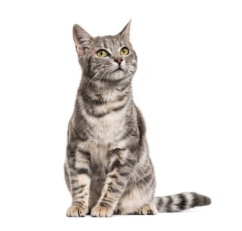

In [35]:
imshow(cat1)

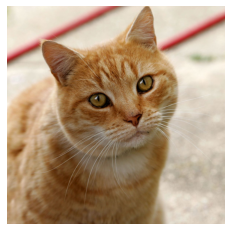

In [36]:
imshow(cat3)

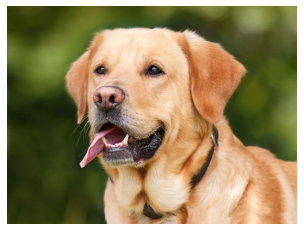

In [37]:
imshow(dog1)

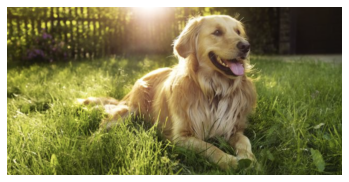

In [38]:

imshow(dog2)

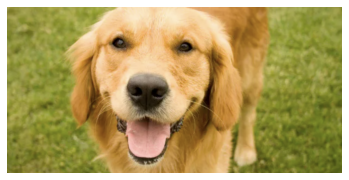

In [39]:




imshow(dog3)


In [16]:
ckp1,cdes1=sift_d.detectAndCompute(cat1,None) # keypoints,descriptions
ckp3,cdes3=sift_d.detectAndCompute(cat3,None)



dkp1,ddes1=sift_d.detectAndCompute(dog1,None)
dkp2,ddes2=sift_d.detectAndCompute(dog2,None)
dkp3,ddes3=sift_d.detectAndCompute(dog3,None)



len(ckp1)

1349

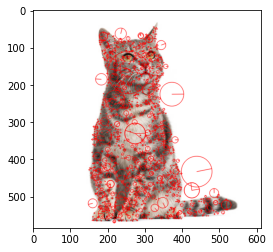

In [42]:
cat1_kp=cv2.drawKeypoints(cat1,ckp1,0,(0,0,255),cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
plt.imshow(cat1_kp[:,:,::-1])

In [20]:
sift_d=cv2.SIFT_create()
orb_d=cv2.ORB_create()


In [21]:
def detecteAndCompute(detector, images):
    kps=[]
    des=[]
    for img in images:
        keypoint, descriptor=detector.detectAndCompute(img, None)
        kps.append(keypoint)
        des.append(descriptor)
    return kps,des

images=[cat1,cat3,dog1,dog2,dog3]
sift_kp, sift_des=detecteAndCompute(sift_d,images)
orb_kp, orb_des=detecteAndCompute(orb_d,images)    

In [22]:
for kp in sift_kp:
    print(len(kp))
print('....')
for kp in orb_kp:
    print(len(kp))    

1349
1734
555
5799
626
....
500
500
500
500
500


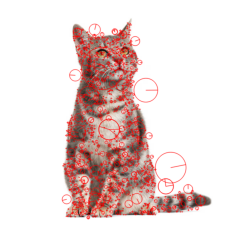

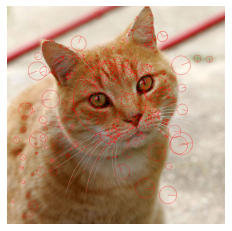

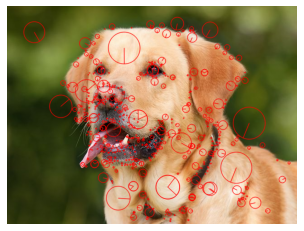

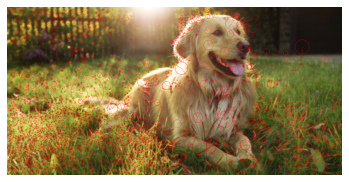

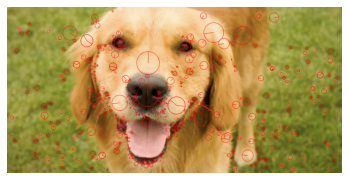

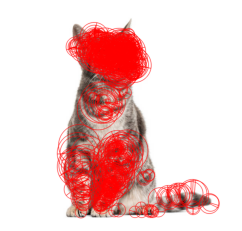

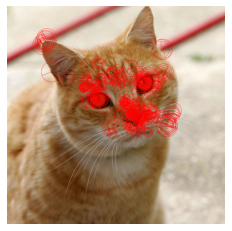

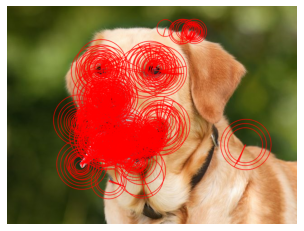

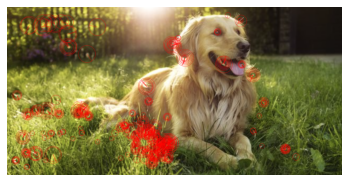

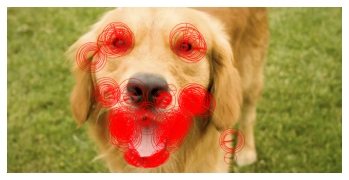

In [23]:
def drawKeypoints(img,kp):
    img_kp=cv2.drawKeypoints(img, kp, 0,(0,0,255),cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
    imshow(img_kp)
    plt.show()


for img,kp in zip(images,sift_kp):
    drawKeypoints(img,kp)
for img,kp in zip(images,orb_kp):
    drawKeypoints(img,kp)        

In [24]:
matcher=cv2.BFMatcher()

In [45]:
query_sift=sift_des[-1]
query_orb=orb_des[-1]

def compare_des(query, descs, tol=0.10, th=0.8):
    results=[]
    for des in descs:
        matches=matcher.knnMatch(query,des, k=2)
        count=0
        
        for m1,m2 in matches:
            gap=abs(m1.distance - m2.distance)
            if gap < (tol * m1.distance):
                count+=1
        
        if count/len(matches) > th:
            results.append(True)
        else:
            results.append(False)
    return results       
sift_res=compare_des(sift_des[-1],sift_des[:-1])
orb_res=compare_des(orb_des[-1],orb_des[:-1])             


In [43]:
def compare_des(query, descs, tol=0.10, th=0.8):
    results=[]
    for des in descs:
        matches=matcher.match(query,des)
        matches=[val.distance for val in matches]
        mean=np.mean(matches)
        results.append(mean)


    return results       
sift_res=compare_des(sift_des[-1],sift_des[:-1])
orb_res=compare_des(orb_des[-1],orb_des[:-1])        


In [46]:
labels=['cat','cat','dog','dog']
prediction=labels[sift_res.index(min(sift_res))]
print(prediction)

dog
